                Id  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
count  1350.000000       1350.000000                           1350.000000   
mean    675.500000          0.060000                              3.577895   
std     389.855743          0.237575                             84.914699   
min       1.000000          0.000000                              0.000000   
25%     338.250000          0.000000                              0.031140   
50%     675.500000          0.000000                              0.156891   
75%    1012.750000          0.000000                              0.543145   
max    1350.000000          1.000000                           2340.000000   

               age  NumberOfTime30-59DaysPastDueNotWorse     DebtRatio  \
count  1350.000000                           1350.000000   1350.000000   
mean     52.048889                              0.257778    356.123363   
std      15.009875                              0.751718   1156.603074   
m

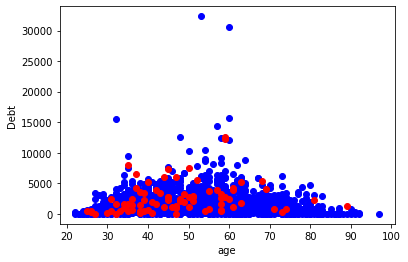

In [93]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

#read data files
url = "https://raw.githubusercontent.com/victoriyagloba/prpo3/main/data.csv"
train_data = pd.read_csv(url)
print(train_data.describe())

# Print top 10 head rows
print("Head data\n", train_data.head(10))

# Print latest 10 rows
print("Tail data\n", train_data.tail(10))

# DebtRatio = DebtRatio * MonthlyIncome, for non empty MonthlyIncome column
train_data.loc[train_data['MonthlyIncome'].notnull(), 'DebtRatio'] = train_data['DebtRatio'] * train_data['MonthlyIncome']
print(train_data)

# Rename DebtRatio column to Debt
train_data.rename(columns={'DebtRatio':'Debt'}, inplace=True)

# Computing of mean monthly income
mean_monthly_income = train_data['MonthlyIncome'].mean(skipna = True)
print("Mean salary", mean_monthly_income)
train_data.loc[train_data['MonthlyIncome'].isnull(), 'MonthlyIncome'] = mean_monthly_income

# Probability of not returning a credit depending on the number of dependents.
print(train_data['SeriousDlqin2yrs'].groupby(train_data['NumberOfDependents']).mean())

# Scattered graph of Age and Debt dependencies.
x = train_data.loc[train_data['SeriousDlqin2yrs'] == 0]['age']
y = train_data.loc[train_data['SeriousDlqin2yrs'] == 0]['Debt']
plt.scatter(x, y, color='blue');

x = train_data.loc[train_data['SeriousDlqin2yrs'] == 1]['age']
y = train_data.loc[train_data['SeriousDlqin2yrs'] == 1]['Debt']
plt.scatter(x, y, color='red');

plt.xlabel('age')
plt.ylabel('Debt')

plt.show()